# Diskussion & grafische Darstellung

## Wie wurde der Roundpath umgesetzt?

## BasicPRM : IPBasicPRM_Roundtrip
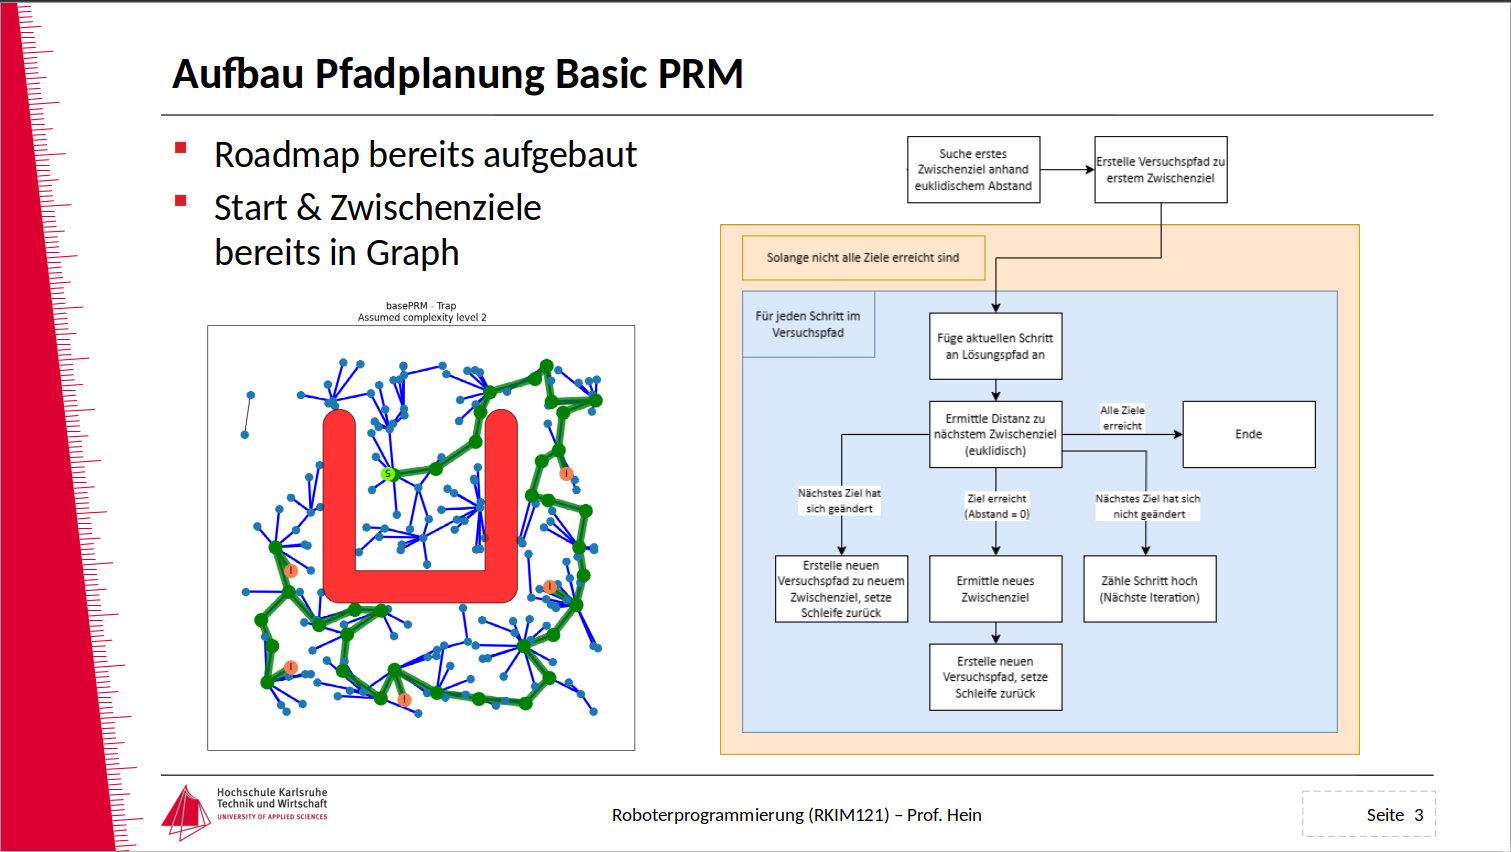

Im Flussdiagramm rechts im Bild werden die Ablaufsschritte und Eventualitäten dargestellt. Die Vorbedingungen sind hierbei, dass die Roadmap vorhanden ist und die Start und Zwischenziele im Graphen sind. Letztere werden in der IPTestSuite definiert.

1. Bestimmung nächstes Ziel mit euklidischem Abstad
2. Erstelle Versuchspfad zu Zwischenziel
3. Prüfe nach jedem Schritt: 
    1. Sind alle Ziele erreicht -> Dann ist der Algorithmus beendet.
    2. Ist ein Zwischenziel erreicht -> Dann erstelle den TryPath zum nächsten Ziel
    3. Hat sich das nächste Ziel geändert -> Umplanung, d.h. neuer Versuchspfad zu neuem nächsten Ziel


## VisibilityPRM : IPVisibilityPRM_RoundTrip: 

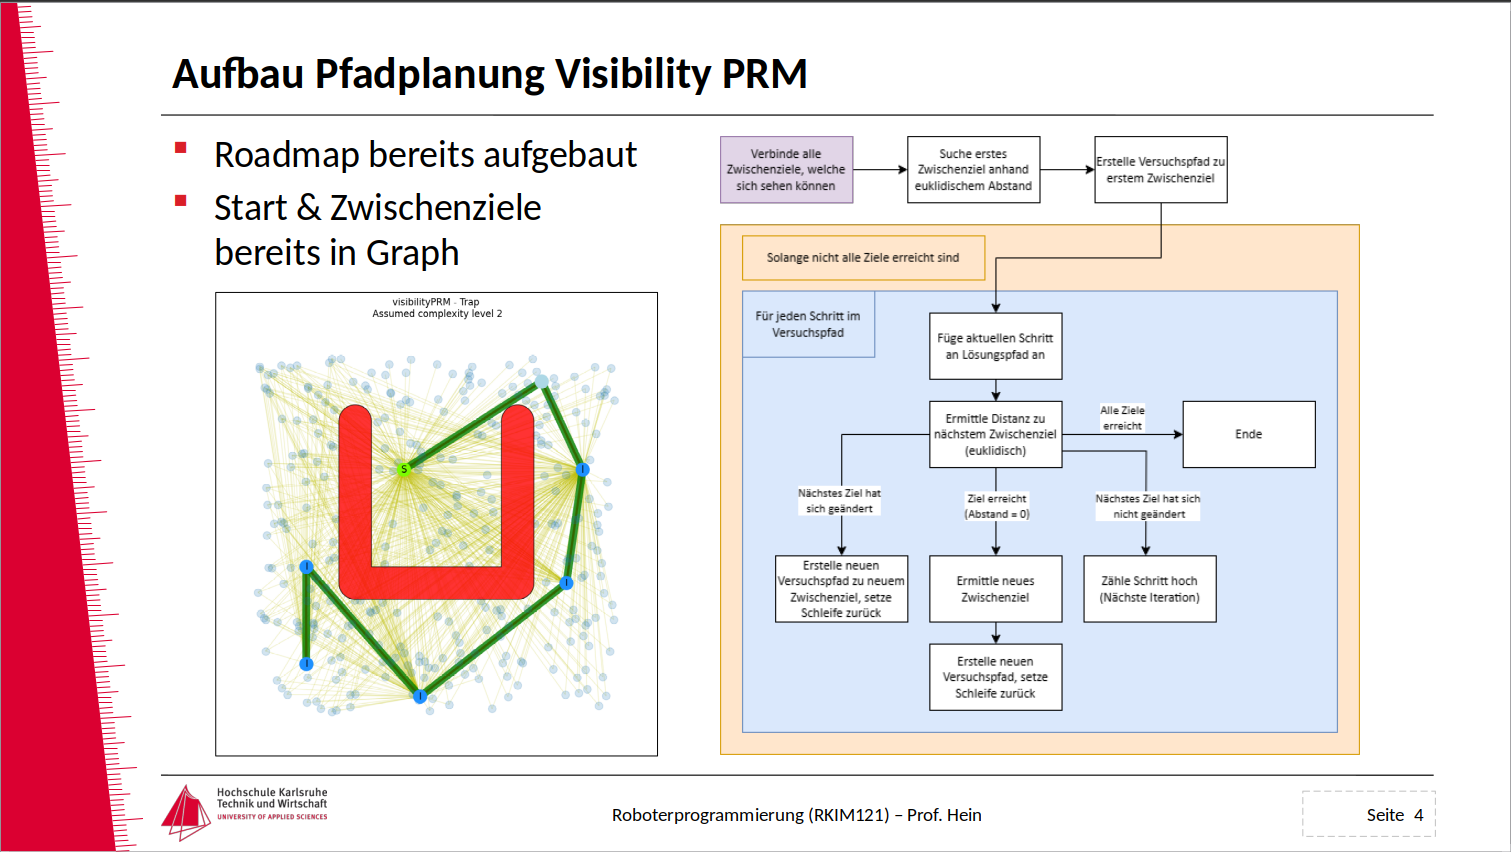



Im Flussdiagramm rechts im Bild werden die Ablaufsschritte und Eventualitäten dargestellt.
Der Unterschied zum BasicPRM ist die Direktverbindung der Nodes, die sich von Beginn an sehen können. Dies bedeutet, dass sich keine Hindernisse dazwischen befinden.
<br>
Es fällt auf, dass der Visibility PRM immer genau 300 Nodes erzeugt. Die Anzahl der Nodes kann per Konfiguration festgelegt werden. 
Wenn die Anzahl der Nodes zu gering wird, findet der Algorithmus keinen Solutionpfad mehr.
Ziel war es die Anzahl der Nodes auf ein Minimum zu reduzieren, um Rechenzeit zu sparen.
Nachfolgend wird dies umgesetzt.

## VisibilityPRM mit Optimierung : CC_IPVisibilityPRM_RoundTrip: 

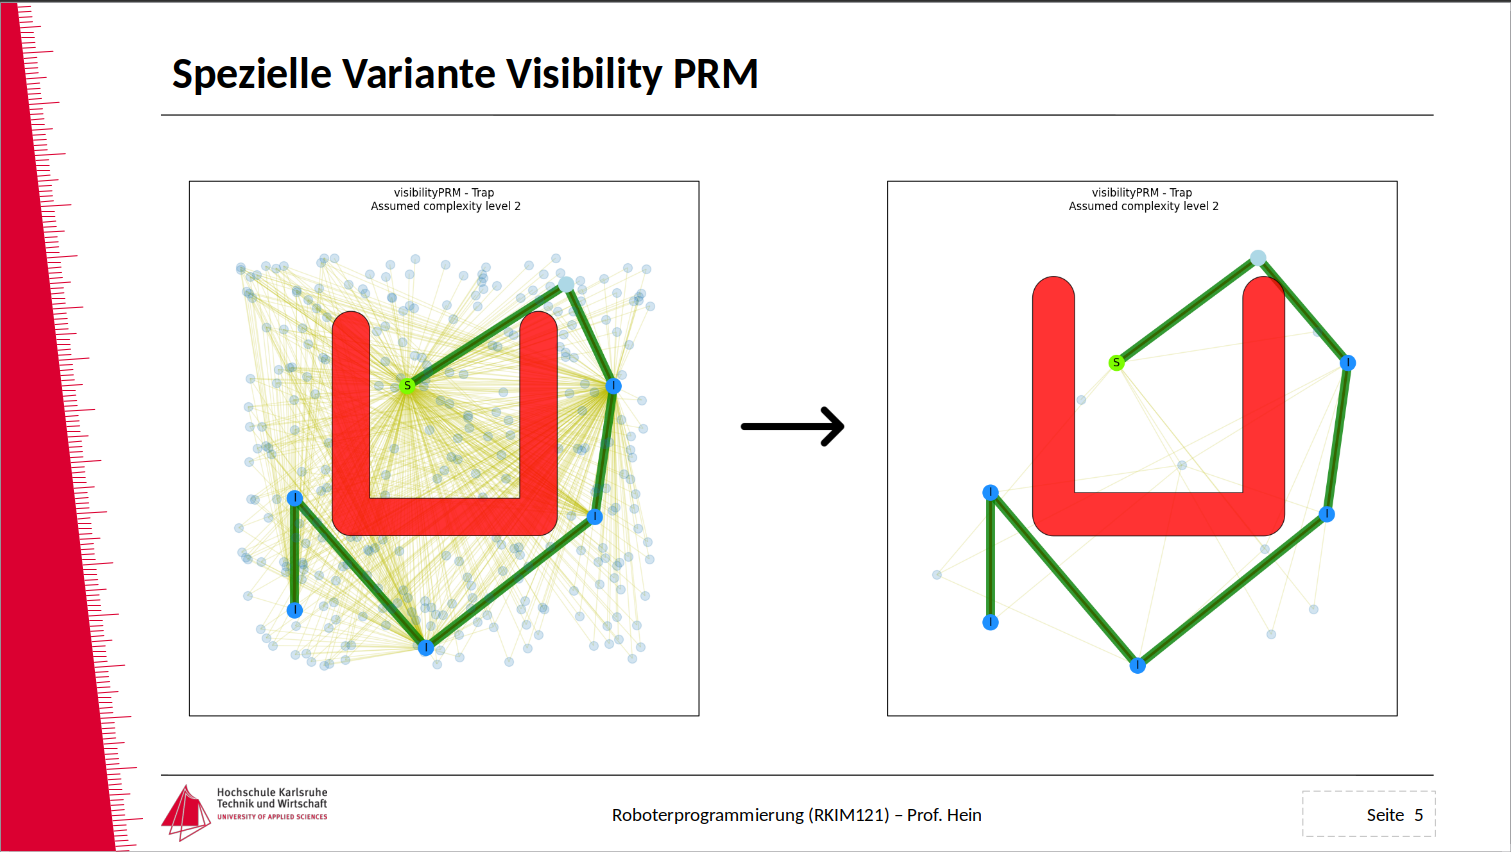

Im Flussdiagramm rechts im Bild werden die Ablaufsschritte und Eventualitäten dargestellt.
Im Unterschied zum normalen Visibility ist, dass die Nodes nur solange erzeugt werden wie es noch keinen vollständigen Pfad gibt.
Diese Optimierung findet in der _learnRoadmap- Methode der in der CC_VisibilityPRM-Klasse statt. Dabei wird geprüft, welche anderen Nodes vom Visibility Algorithmus gesehen werden. Falls es eine Verbindung gibt, dann verbinde beide Nodes, falls nicht werden neue Nodes erzeugt. Dies geschieht solange, bis alle Nodes sich im Graphen befinden.
Dies resultiert in:

* weniger Nodes
* simplere Pfade im Vergleich zu Lazy oder Basic
* zu einer geringeren Ausführungszeit im Vergleich zum unoptimierten Visibilty Ausführungszeitreduktion
  (3s bei originalem, 0.5s bei Optimierten)



## LazyPRM : IPLazy_PRM_Roundtrip: 

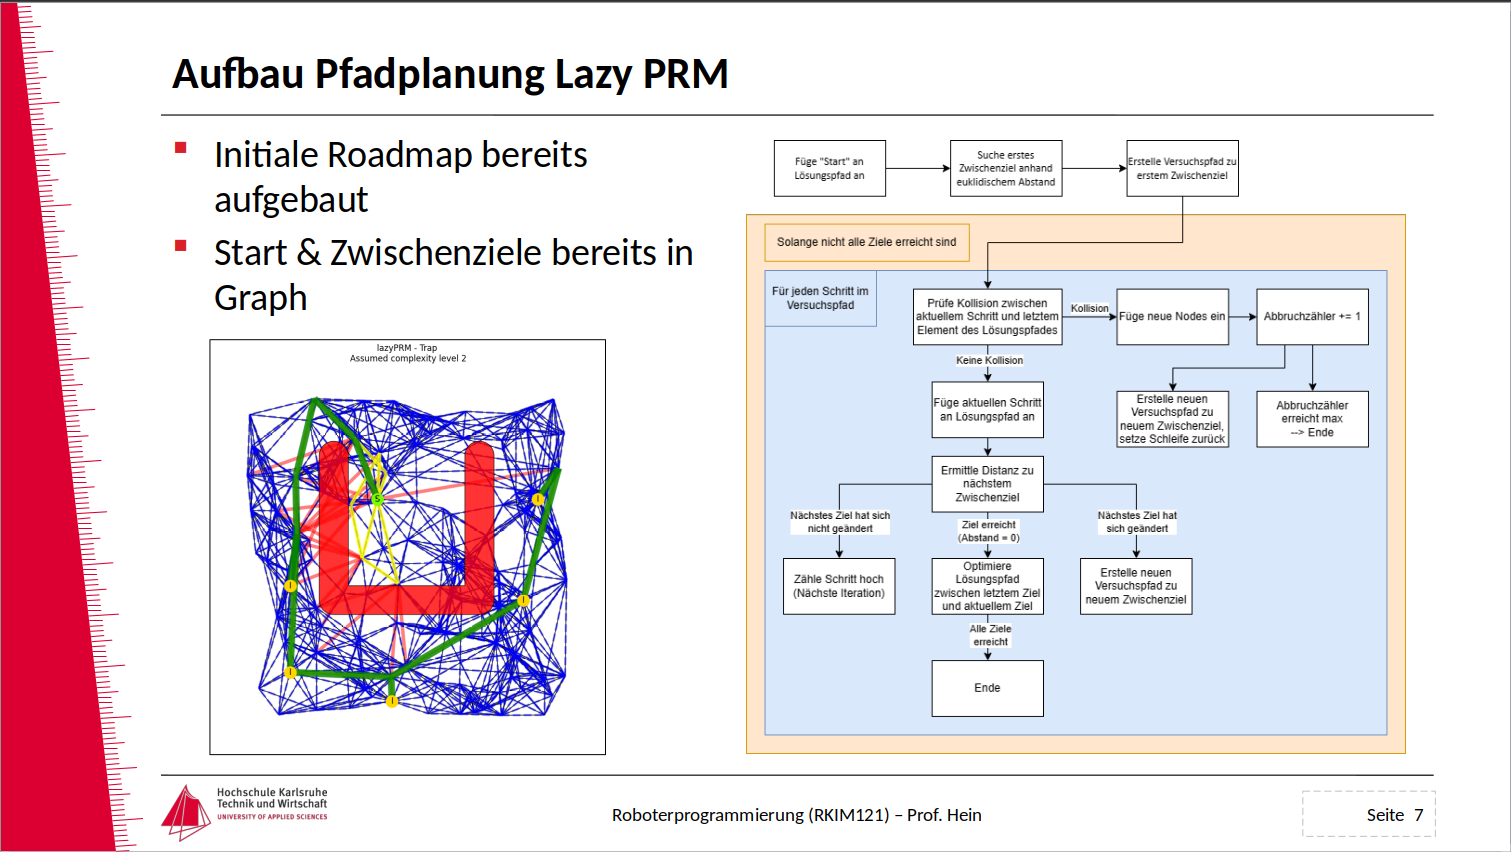
Im Flussdiagramm rechts im Bild werden die Ablaufsschritte und Eventualitäten dargestellt.

Funktionsweise Lazy: <br>
Zunächst wird dem Lazy der "Start" angehangen. Danach wird das erste Ziel mittels des euklischem Abstand gesucht. Danach wird ein Versuchspfad zum ersten Zwischenziel gesucht.
Anschließend wird geprüft, ob es eine Kollison auf dem gewünschten Pfad gibt. Falls dem so ist, werden neue Nodes hinzugefügt und der Abbruchzähler wird erhöht.
Es wird ein neuer Versuchspfad erstellt und die Schleife zurückgesetzt.

Falls es keine Kollision gibt, wird die Distannz zum nächsten Zwischenziel ermittelt. Falls das Ziel erreicht wurde, wir der Lösungs Pfad noch optimiert. 
Falls das Ziel sich nicht geändert hat, wird der Schritt hochgezählt.
Bei einem neuen Ziel wird der Pfad umgeplant und es gibt einen neuen Versuchspfad zu einem neuen Zwischenziel.
Sobald alle Ziele erreicht wurden, endet der Algorithmus.
Neue Versuchspfade werden mittels der eingebauten Methode nx.shorestPath(Start, Ziel) ermittelt.

Dabei viele Nodes (im Schnitt 470 Nodes) und findet vergleichsweise komplexe Wege. Die Solutionpfade des Visibility-Algorithmus sind wesentlich einfacher nachzuvollziehen.
Der Lazy-Algorithmus ist dabei aber sehr schnell. 

## Durchführungszeit
Nachfolgend dargestellt sind die mittleren Durchführungszeiten anhand von 25 Wiederholungen. Auf der X-Achse befinden sich die Benchmarks, auf der Y-Achse sind die Ausführungszeiten in Sekunden.

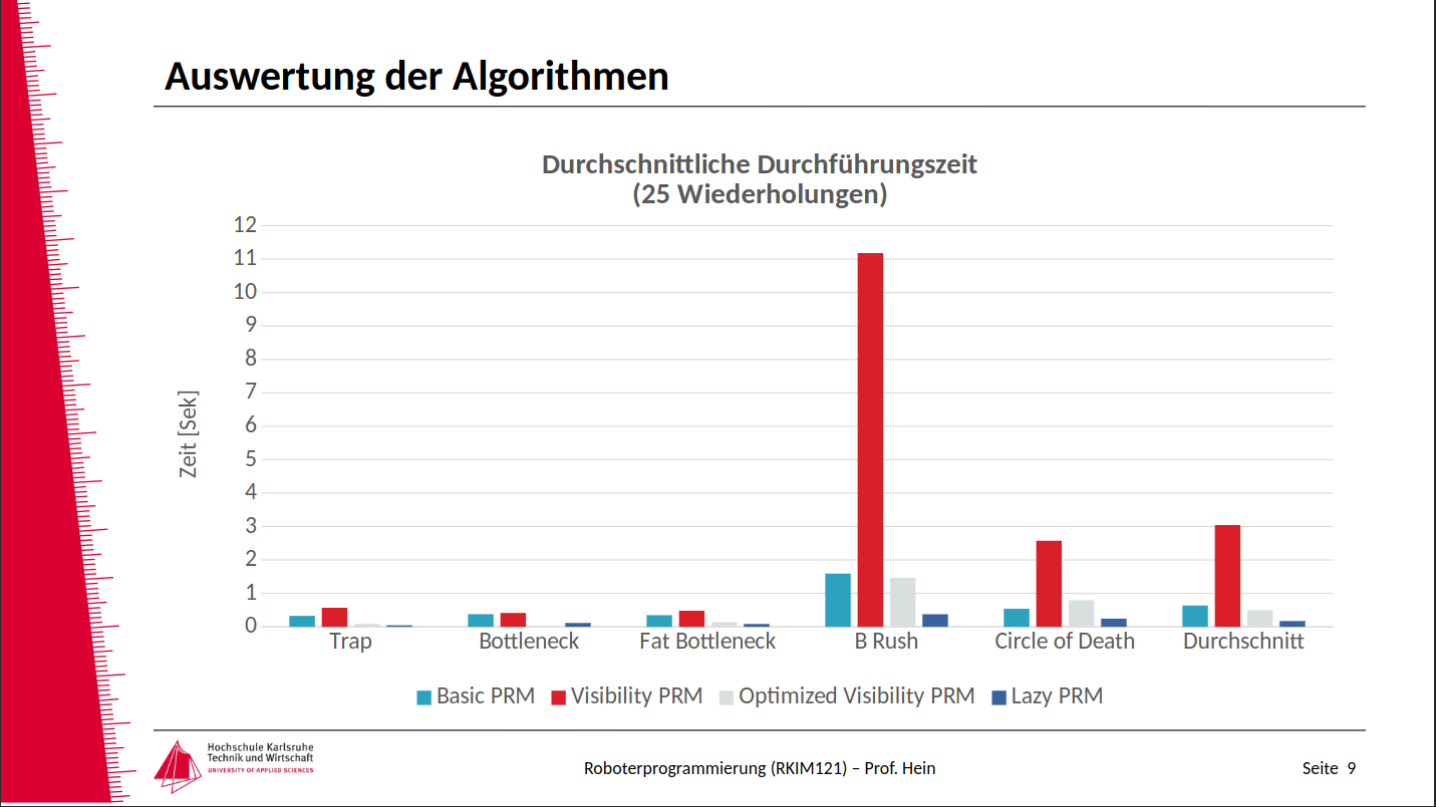

Der schnellste Algorithmus ist der LazyPRM, gefolgt von unserem optimierten VisibilityPRM. Anschließend folgt der BasicPRM, der normale VisibilityPRM stellt das Schlusslicht dar.
Der Lazy ist am schnellsten, weil er weniger rechenzeitintensive Kollisionschecks macht. 
Der optimierte Visbility (CC_Visibility) hat die Anzahl die Nodes stark reduziert, damit ist dieser deutlich schneller. Prozentual gesehen werden im Schnitt 97 % weniger Nodes erzeugt.
Der BasicPRM befindet sich im Mittelfeld, da seine Nodeanzahl sich im Mittelfeld befindet und er relative viele Kollisionschecks ausführt.

## Erfolgsrate
In der nächsten Grafik wird die Erfolgsrate (d.h. die Wahrscheinlichkeit, dass ein Algorithmus eine Solution findet). Auf der X-Achse befinden sich die Benchmarks, auf der Y-Achse befindet sich die Erfolgsrate in Prozent.
.
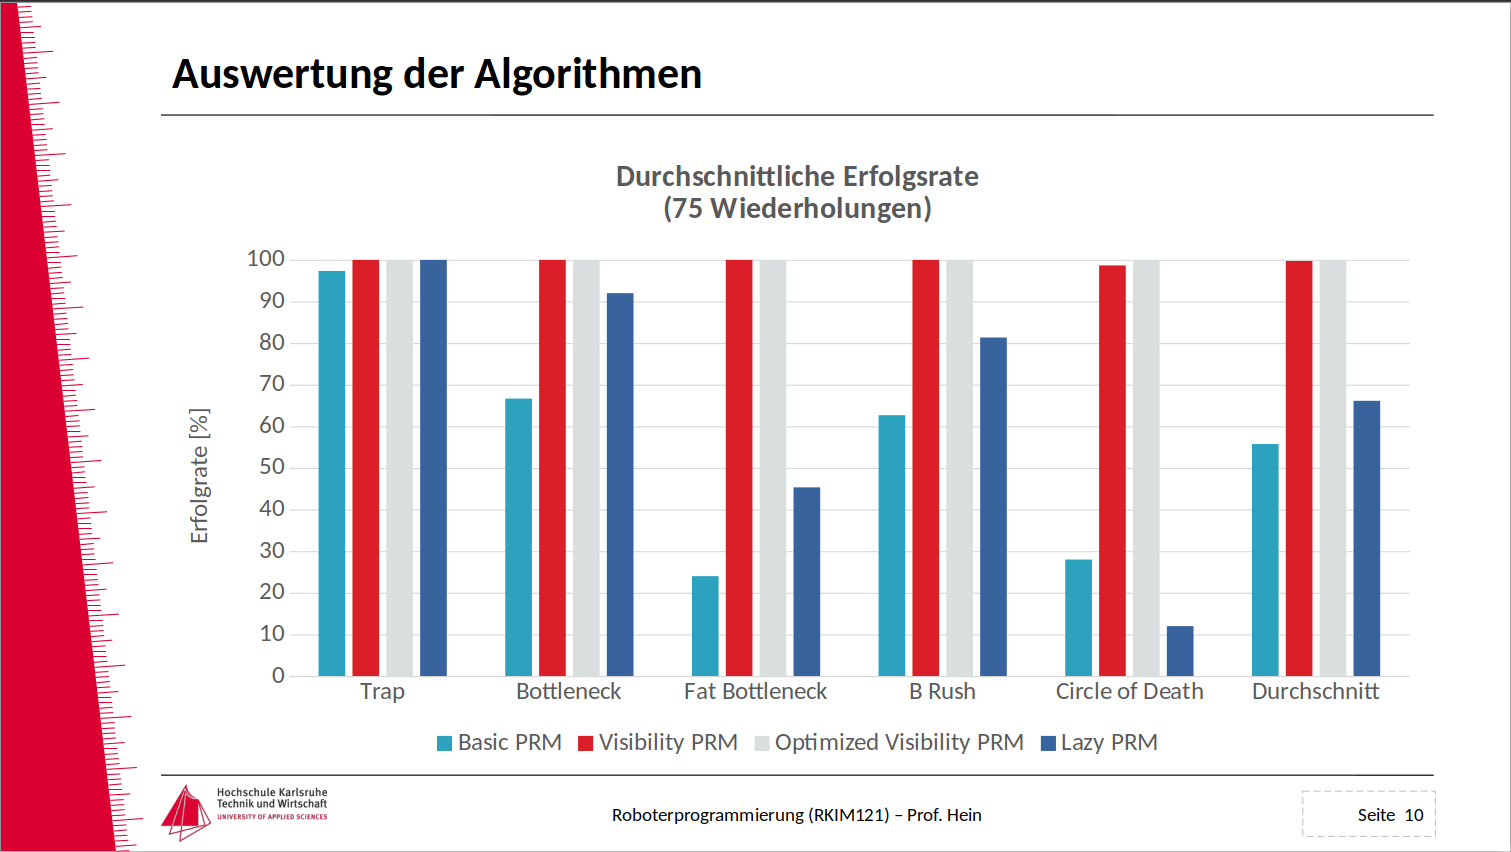

Hierbei fällt auf, dass der Standard- und der optimierte Visibility haben nahezu eine perfekte Erfolgsrate und es wurden nahezu immer eine hundertprozentige Erfolgsrate festgestellt.
Die Erfolgsraten des BasicPRMs und des LazyPRMs befinden sich im Mittelfeld.
Auffällig ist, dass besonders schmale Gänge in den Benchmarks "Fat Bottleneck" und "Circle Of Death" bei den beiden Algorithmen "BasicPRM" und "LazyPRM" Probleme bereiten.
  
## Größe der Roadmap

In der nächsten Grafik wird die Größe der Roadmap dargestellt. Auf der X-Achse befinden sich die Benchmarks, auf der Y-Achse befindet sich die Größe der Roadmap.
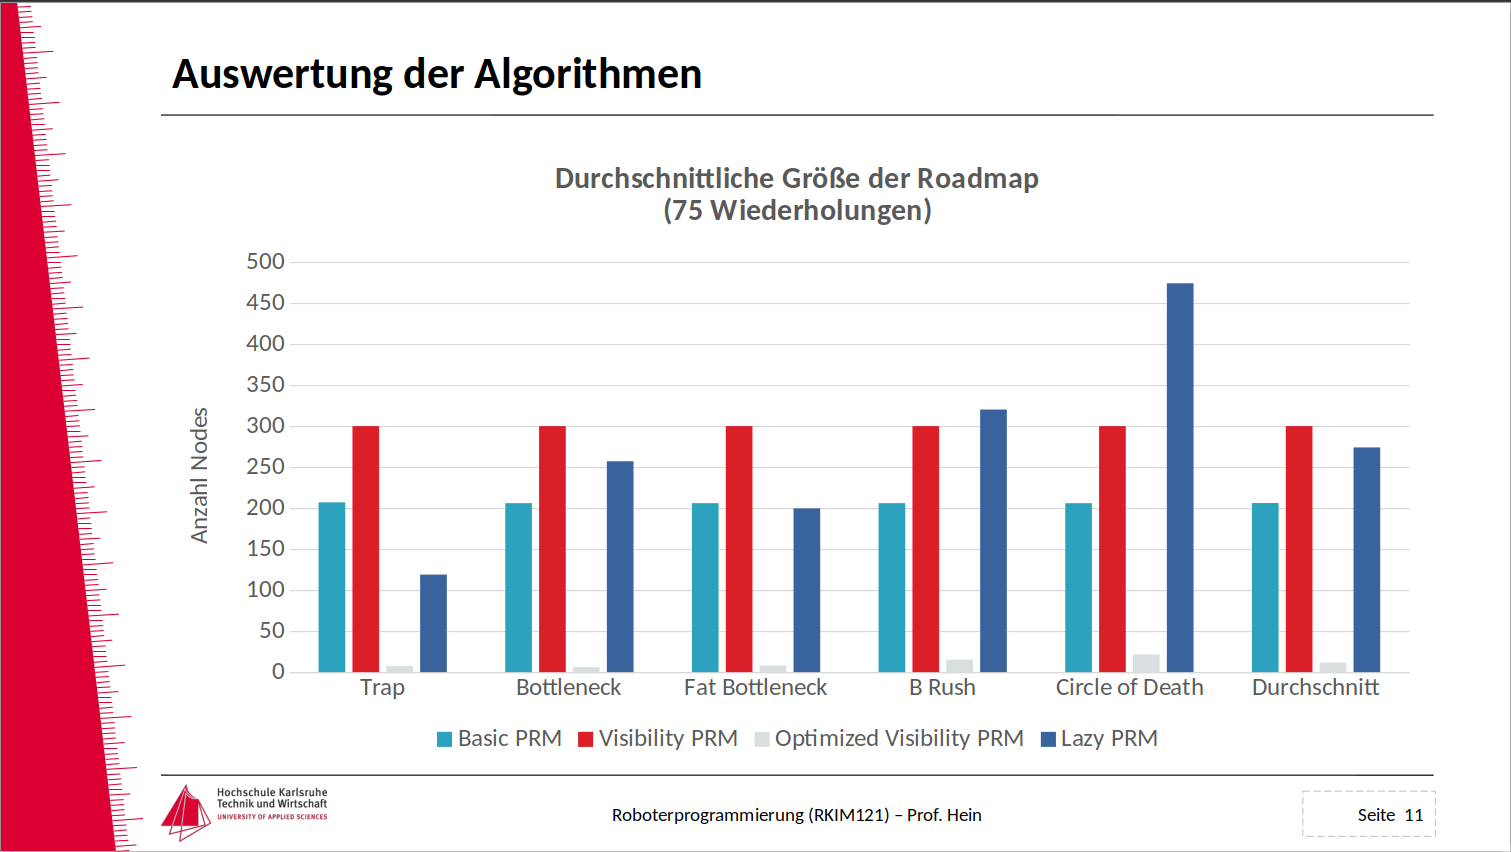

Hierbei ist anzumerken, dass der optimierte VisibilityPRM die kleinste Roadmap besitzt. Der Standard Visibility PRM hat eine einheitliche Roadmap Größe.
Der LazyPRM hat die größte Roadmap, wobei diese bis zu 470 Nodes erreicht. Das BasicPRM Verfahren erzeugt eine moderate Roadmap-Größe.